<table align="center" width=100%>
    <tr>
        <td width="14%">
            <img src="amazon.png">
        </td>
        <td>
            <div align="center">
                <font color="purple" size=50%>
                    <b>Amazon Recommendation System
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement 

Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce 
websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, 
and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations 
are so essential that customers now expect to see similar features on all other e-commerce sites. Amazon is 
referred to as "one of the most influential economic and cultural forces in the world", as well as the world's most valuable 
brand. Our objective is to make a recommendation system that recommends new products based on user’s habits.

# Data Definition

**ID :** Product ID.<br>
**Brand :** Name of the Brand to which the product belongs..<br>
**Categories :** Category of the product..<br>
**dateAdded :** Date on which the product was added..<br>
**dateUpdated :** Date on which the product was updated..<br>
**Manufacturer :** Name of the manufacturer of the product..<br>
**Manufacturer Number :** Number given to the product by the manufacturer..<br>
**Name :** Name of the product..<br>
**reviews.numHelpful :** Number of helpful reviews for the product..<br>
**reviews.rating :** Rating for the product on each review..<br>
**reviews.text :** Informative Review on the product..<br>
**reviews.title :** Title for each review on the product..<br>
**reviews.username :** Username of person posting the review.

# Table of Contents

1. **[Import The Required Libraries](#import_lib)** 
2. **[Set Options](#set)** 
3. **[Read The Data](#RD)** 
4. **[Data Prepration](#eda)**
    - 4.1 - [Data Dimension](#Data_Shape)
    - 4.2 - [Data Types](#Data_Types)
    - 4.3 - [Drop Duplicates](#DD)
    - 4.4 - [Missing Values](#Missing_Values)
    - 4.4 - [Checking Outliers](#outliers)
    - 4.5 - [Encoding](#Enc)
5. **[Clustering](#C)**
    - 5.1 - [K-Means Clustering](#KMC)
    - 5.2 - [Heirarchical Clustering](#HC)
        - 5.2.1 - [Silhouette Score Method](#SSC)
        - 5.2.2 - [Cluster Analysis - 1](#CA1)
        - 5.2.3 - [Cluster Analysis - 2](#CA2)
    - 5.3 - [DBSCAN](#DBSCAN)
6. **[Building Recommendation Systems](#BRS)**
    - 6.1 - [Popularity Based Recommendation System](#PB)
    - 6.2 - [Content Based Recommendation System](#CB)
    - 6.3 - [Collaborative Filtering](#CF) 
    - 6.4 - [Hybrid Recommendation System](#HR)
7. **[Association](#as)**

<a id='import_lib'></a>
## 1. Import The Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import pdist

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet

from sklearn.neighbors import NearestNeighbors

from mlxtend.frequent_patterns import apriori, association_rules

from surprise import Dataset, Reader, KNNWithMeans, SVDpp, accuracy
from surprise.model_selection import train_test_split, cross_validate

%run -i viz_silhouette.py # visualizing silhouette score and cluster

<a id='set'></a>
## 2. Set Options

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
plt.rcParams['figure.figsize'] = [15,8]

np.set_printoptions(suppress = True)

from warnings import filterwarnings
filterwarnings('ignore')

<a id='RD'></a>
## 3. Read the data

In [3]:
data = pd.read_excel('electronicreviews.xlsx')
data.head(3)

id      brand  \
0  AVpf3txeLJeJML43FN82  Microsoft   
1  AVpf3txeLJeJML43FN82  Microsoft   
2  AVpf3txeLJeJML43FN82  Microsoft   

                                          categories colors  \
0  Electronics,Computers,Computer Accessories,Key...  Black   
1  Electronics,Computers,Computer Accessories,Key...  Black   
2  Electronics,Computers,Computer Accessories,Key...  Black   

              dateAdded           dateUpdated manufacturer manufacturerNumber  \
0  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z    Microsoft          RH7-00001   
1  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z    Microsoft          RH7-00001   
2  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z    Microsoft          RH7-00001   

                                                name  reviews.numHelpful  \
0  Microsoft Surface Pro 4 Type Cover with Finger...            2.000000   
1  Microsoft Surface Pro 4 Type Cover with Finger...            5.000000   
2  Microsoft Surface Pro 4 Type Cover with Finger...            3.000000   

   reviews.rating                                       reviews.text  \
0        5.000000  This keyboard is very easy to type on, but the...   
1        4.000000  It's thin and light. I can type pretty easily ...   
2        4.000000  I love the new design the keys are spaced well...   

                 reviews.title reviews.username  
0  Love the fingerprint reader             JNH1  
1                         Nice             Appa  
2                          New             Kman

<a id='eda'></a>
## 4. Data Prepration

<a id='Data_Shape'></a>
#### 4.1 Data Dimension

In [4]:
data.shape

(7298, 14)


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                    Interpretation: The data has 7298 observations and 14 variables.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### 4.2 Data Types <a id='Data_Types'></a>

In [5]:
data.dtypes

id                     object
brand                  object
categories             object
colors                 object
dateAdded              object
dateUpdated            object
manufacturer           object
manufacturerNumber     object
name                   object
reviews.numHelpful    float64
reviews.rating        float64
reviews.text           object
reviews.title          object
reviews.username       object
dtype: object

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
Interpretation: All the variables are object type except reviews_numHelpful and reviews_rating.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### 4.3 Dropping Duplicates <a id='DD'></a>

In [6]:
data.drop_duplicates(inplace=True)

#### Remove Insignificant Variables

There are few columns  which is redundant for further analysis Thus, we drop the column.

In [7]:
data.drop(['dateAdded','manufacturer','colors','dateUpdated','manufacturerNumber'], axis=1, inplace=True)

#### 4.4 Missing Value Treatments <a id='Missing_Values'></a>

In [8]:
missing_values = pd.DataFrame({
    'value':data.isnull().sum(),
    'percentage': data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='percentage', ascending=False)

value  percentage
reviews.numHelpful   1486   20.361743
reviews.rating        164    2.247191
reviews.text            5    0.068512
reviews.title           4    0.054810
id                      0    0.000000
brand                   0    0.000000
categories              0    0.000000
name                    0    0.000000
reviews.username        0    0.000000

#### Visualize Missing Values using Heatmap

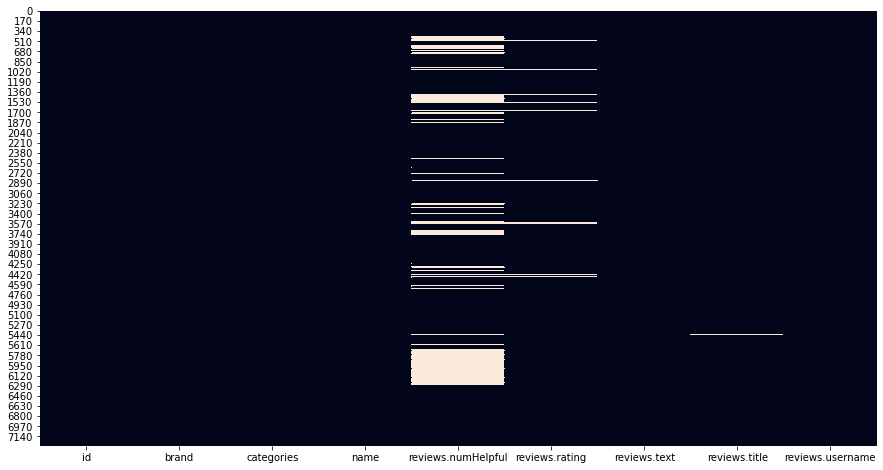

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

#### Handling missing values

In [10]:
data['reviews.numHelpful']=data['reviews.numHelpful'].fillna(0)

In [11]:
data['reviews.rating'] = data['reviews.rating'].fillna(data.groupby('brand')['reviews.rating'].transform('mean'))

In [12]:
data.dropna(inplace=True)

In [13]:
missing_values = pd.DataFrame({
    'value':data.isnull().sum(),
    'percentage': data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='percentage', ascending=False)

value  percentage
id                      0    0.000000
brand                   0    0.000000
categories              0    0.000000
name                    0    0.000000
reviews.numHelpful      0    0.000000
reviews.rating          0    0.000000
reviews.text            0    0.000000
reviews.title           0    0.000000
reviews.username        0    0.000000

In [14]:
data.shape

(7289, 9)

#### Revisualize Missing Values using Heatmap

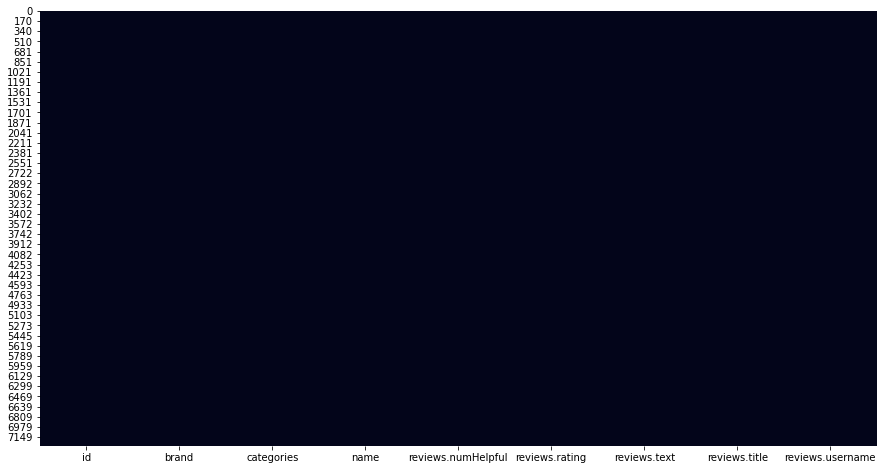

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

<a id='outliers'></a>
## 5. Checking Outliers

In [16]:
data_num = data.select_dtypes(include=np.number)

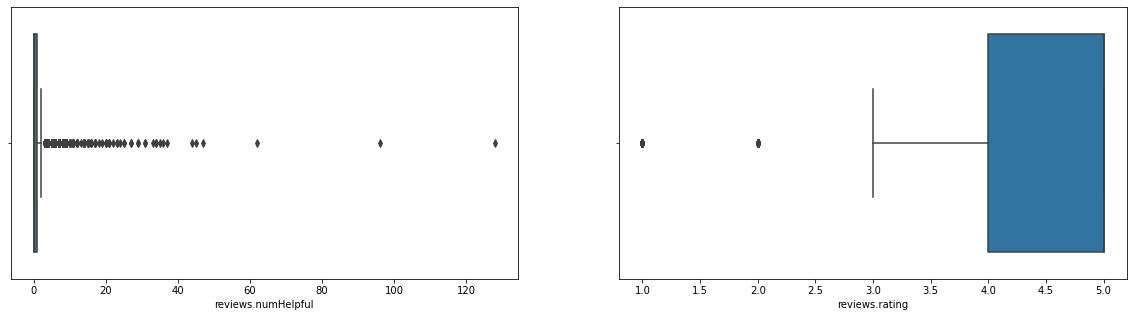

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,5))
for variable, subplot in zip(data_num.columns, ax.flatten()):
    sns.boxplot(data_num[variable], ax = subplot)
plt.show()

In [18]:
q1 = data.quantile(0.25) 
q3 = data.quantile(0.75) 
iqr = q3 - q1 

In [19]:
outlier = pd.DataFrame((data_num < (q1 - 1.5 * iqr)) | (data_num > (q3 + 1.5 * iqr)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column reviews.numHelpful are 551
Total number of Outliers in column reviews.rating are 540


In [20]:
data = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)] 
data.reset_index(inplace=True)
data.drop('index',axis=1, inplace=True)

In [21]:
data.shape

(6243, 9)

### 4.5 Encoding <a id='Enc'></a>

In [22]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['user_Id'] = lb.fit_transform(data['reviews.username'])

lb = LabelEncoder()
data['Product_Id'] = lb.fit_transform(data['id'])

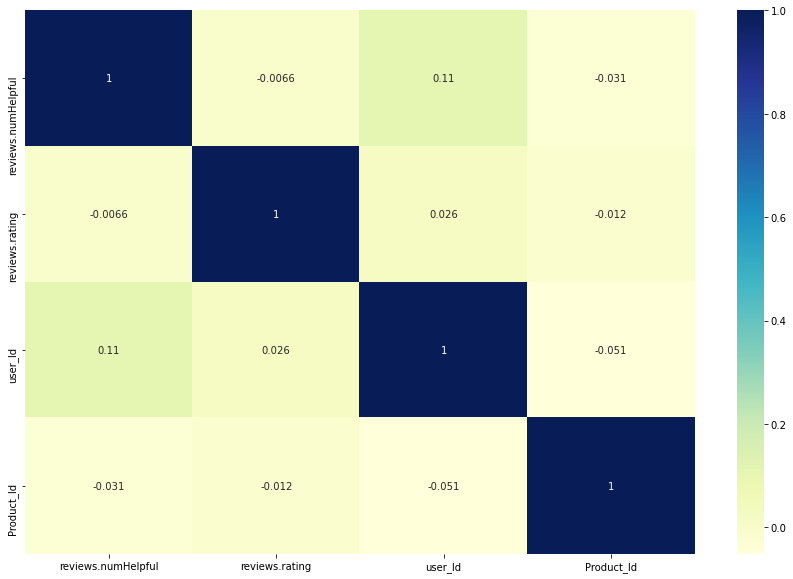

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")
plt.show()

#### Scaling Data

In [24]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
data_trns = ss.fit_transform(data.select_dtypes(include=np.number))
data_scaled = pd.DataFrame(data_trns,columns=['reviews.numHelpful','reviews.rating','user_Id','Product_Id'])
data_scaled.head()

reviews.numHelpful  reviews.rating  user_Id  Product_Id
0            1.000000        1.000000 0.376097    0.244898
1            1.000000        1.000000 0.839276    0.244898
2            0.500000        0.000000 0.029744    0.244898
3            0.500000        1.000000 0.850206    0.244898
4            1.000000        0.500000 0.892313    0.244898

<a id='C'></a>
# **5. Clustering**

<a id='KMC'></a>
## 5.1 K-Means Clustering

In [25]:
k_data = data_scaled[['Product_Id','reviews.rating']]
k_data.head()

Product_Id  reviews.rating
0    0.244898        1.000000
1    0.244898        1.000000
2    0.244898        0.000000
3    0.244898        1.000000
4    0.244898        0.500000

In [26]:
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i,  random_state=4)
    kmeans.fit(k_data)
    wcss.append(kmeans.inertia_)

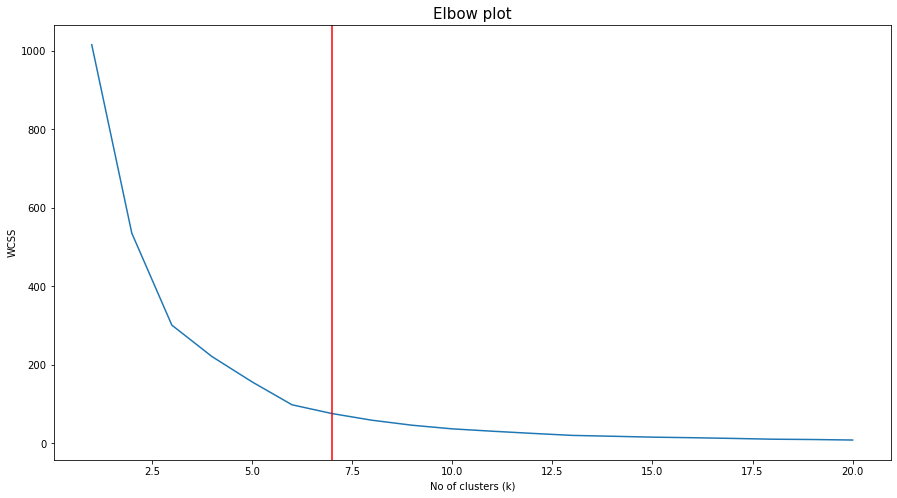

In [27]:
plt.plot(range(1,21), wcss)

plt.title('Elbow plot', fontsize=15)
plt.xlabel('No of clusters (k)', fontsize=10)
plt.ylabel('WCSS', fontsize=10)

plt.axvline(x = 7, color = 'red')
plt.show()

In [28]:
n_clusters  = [2, 3, 4, 5, 6, 7]

for k in n_clusters:
    cluster = KMeans(n_clusters=k, random_state=4)
    predict = cluster.fit_predict(k_data)
    score = silhouette_score(k_data, predict, random_state=4)
    print(f"For {k} cluster the silhouette score is {score}")

For 2 cluster the silhouette score is 0.5120662061640083
For 3 cluster the silhouette score is 0.5332207807695257
For 4 cluster the silhouette score is 0.5669065062862726
For 5 cluster the silhouette score is 0.576932457308508
For 6 cluster the silhouette score is 0.6028081839243844
For 7 cluster the silhouette score is 0.6264304169268764


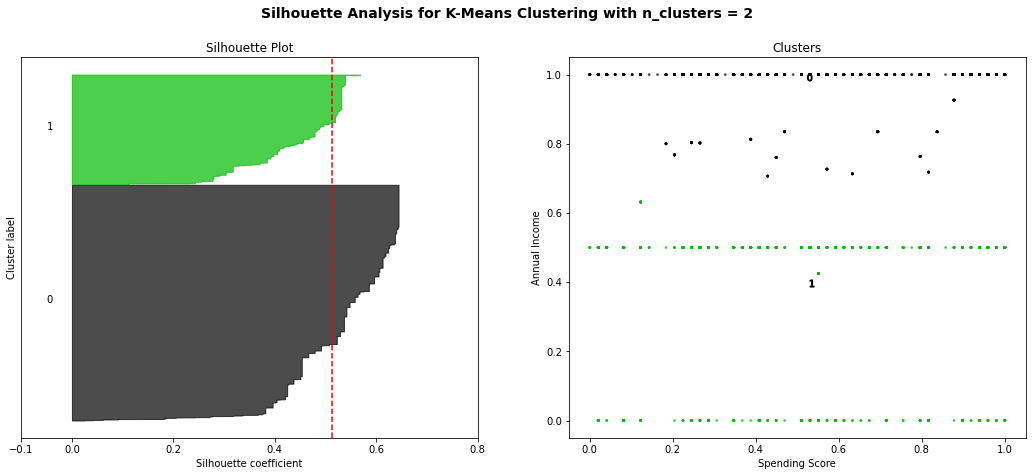

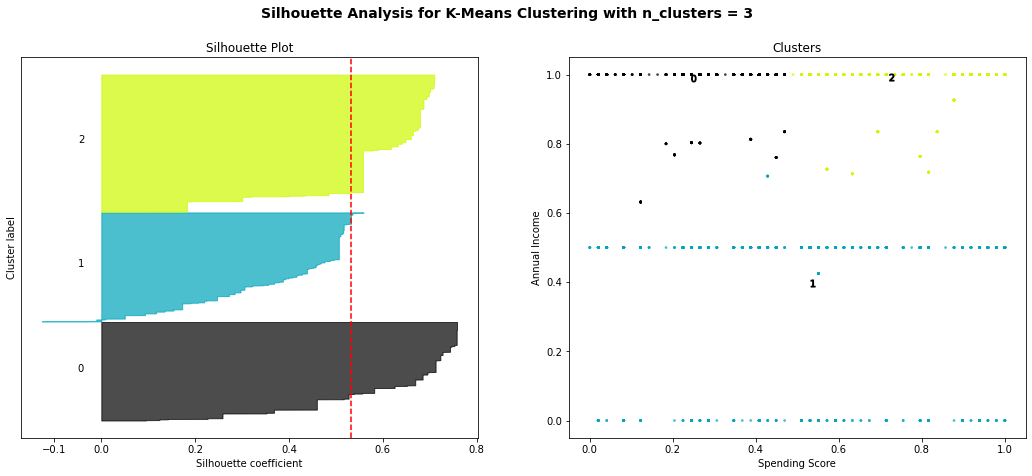

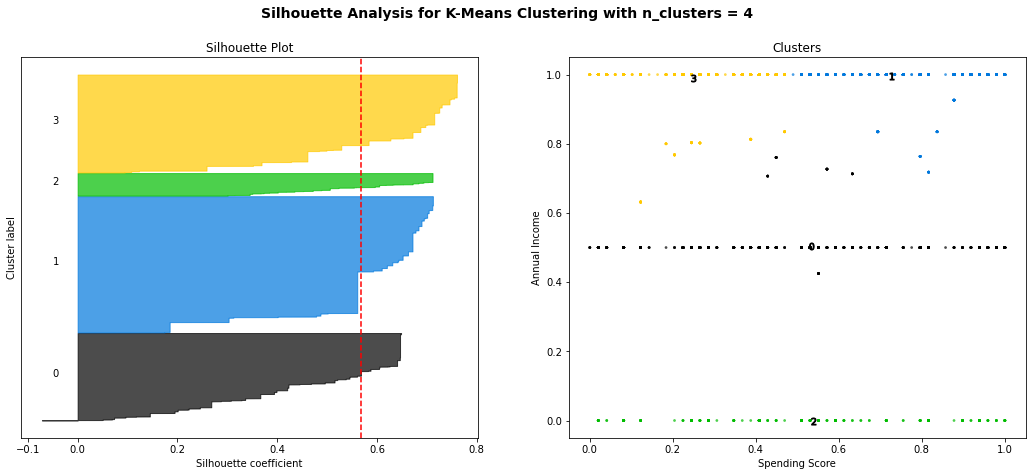

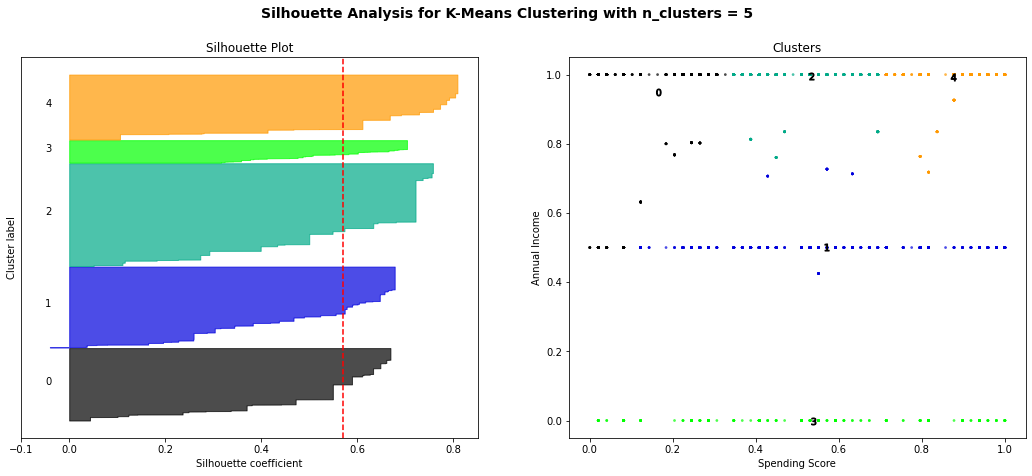

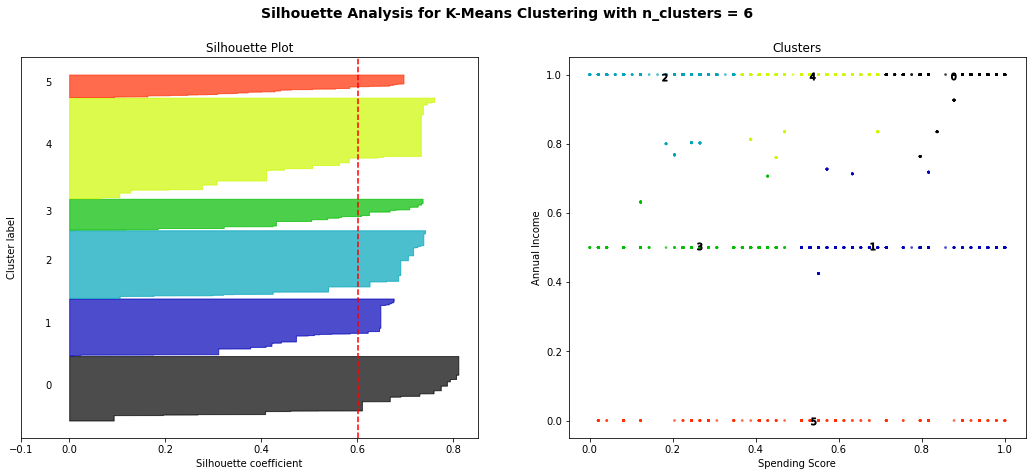

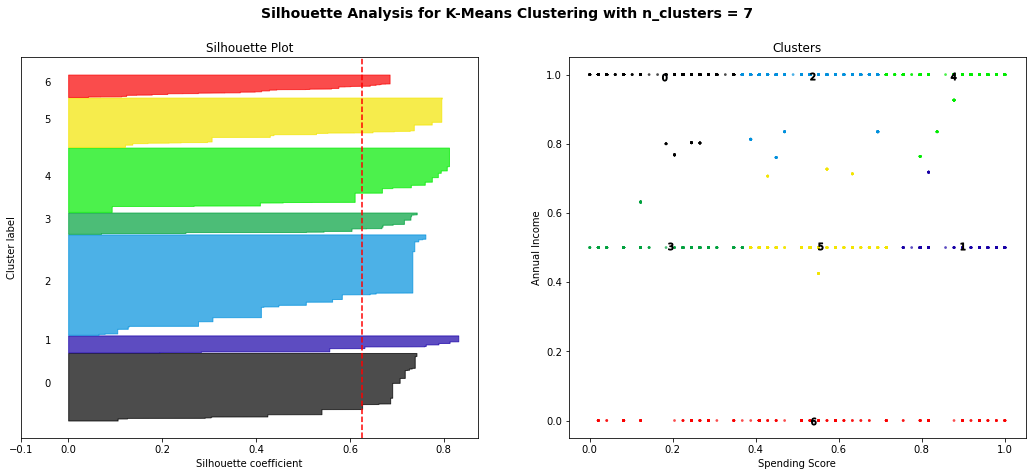

In [29]:
viz(k_data, [2, 3, 4, 5, 6, 7])

In [30]:
k_cluster = KMeans(n_clusters=7, random_state=4)

k_cluster.fit(k_data)
data['kmeans_cluster'] = k_cluster.labels_

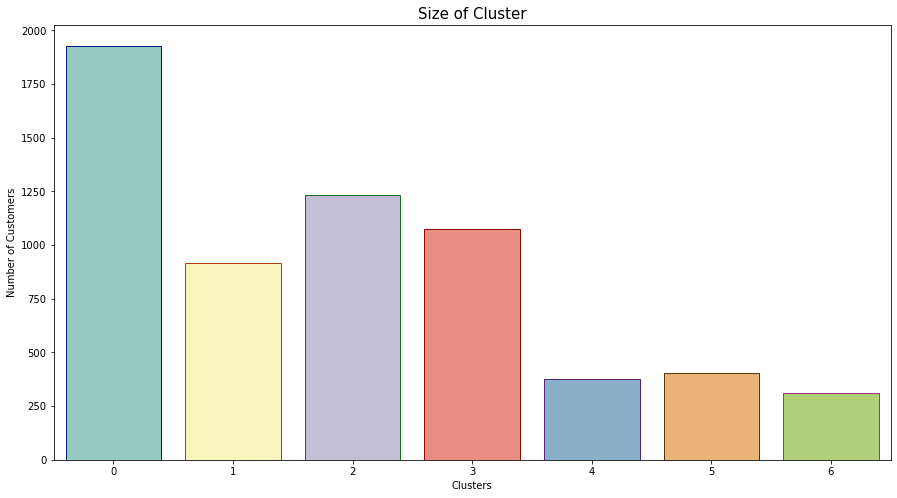

In [31]:
sns.countplot(data= data, x = 'kmeans_cluster',palette='Set3', edgecolor=sns.color_palette('dark',7))

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Number of Customers', fontsize = 10)

plt.show()

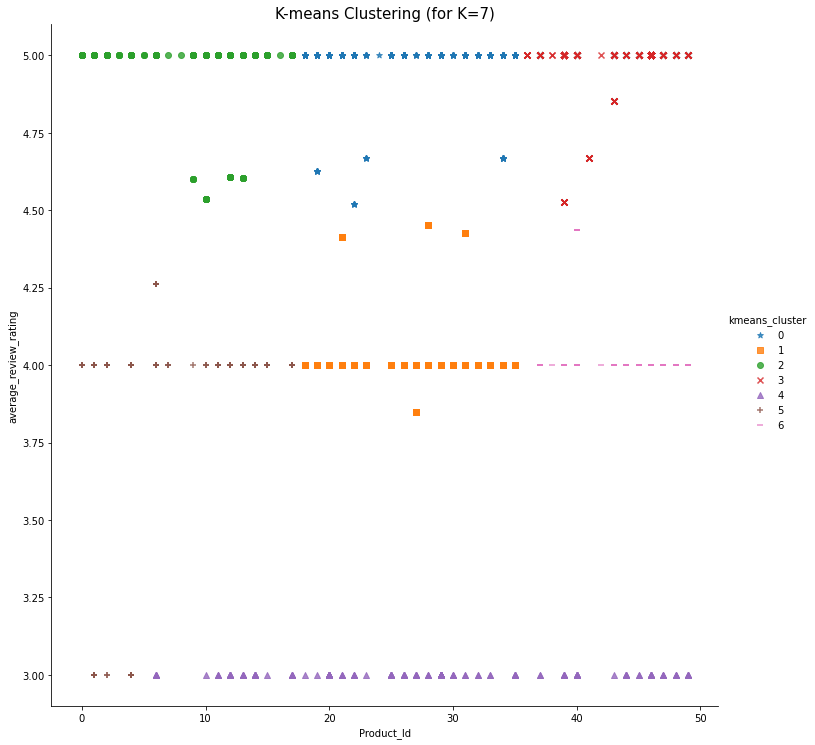

In [32]:
sns.lmplot(x = 'Product_Id', y = 'reviews.rating', data = data, hue = 'kmeans_cluster', 
                markers = ['*', ',','o','x','^','+','_'], fit_reg = False, size = 10)

plt.title('K-means Clustering (for K=7)', fontsize = 15)
plt.xlabel('Product_Id', fontsize = 10)
plt.ylabel('average_review_rating', fontsize = 10)

plt.show()

#### Analyzing 2 opposite cluster

In [33]:
print(f'Size of cluster {data.kmeans_cluster.value_counts()[0]}')

data[data.kmeans_cluster == 0].describe()

Size of cluster 1929


reviews.numHelpful  reviews.rating     user_Id  Product_Id  \
count         1929.000000     1929.000000 1929.000000 1929.000000   
mean             0.539139        4.991232 2687.575428   26.698289   
std              0.573125        0.056741 1624.648461    4.787085   
min              0.000000        4.520693    4.000000   18.000000   
25%              0.000000        5.000000 1248.000000   22.000000   
50%              0.000000        5.000000 2656.000000   29.000000   
75%              1.000000        5.000000 4076.000000   29.000000   
max              2.000000        5.000000 5579.000000   35.000000   

       kmeans_cluster  
count     1929.000000  
mean         0.000000  
std          0.000000  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          0.000000

In [34]:
data[data.kmeans_cluster == 0].describe(include='object')

id     brand  \
count                   1929      1929   
unique                    18        15   
top     AVpgfP3DilAPnD_xtG3M  Logitech   
freq                     754       754   

                                               categories  \
count                                                1929   
unique                                                 18   
top     Electronics,Accessories & Supplies,Audio & Vid...   
freq                                                  754   

                                                     name  \
count                                                1929   
unique                                                 18   
top     Logitech 915-000224  Harmony Ultimate One 15-D...   
freq                                                  754   

                                             reviews.text reviews.title  \
count                                                1929          1929   
unique                                               1899          1454   
top     Using this with a Sony BD player and Onkyo 5.1...    Five Stars   
freq                                                    7            86   

         reviews.username  
count                1929  
unique               1802  
top     ByAmazon Customer  
freq                   24

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
Interpretation: In cluster 0 average rating for products is 4.9 having 1454 unique review and 5 star rating is give 86 time.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
print(f'Size of cluster {data.kmeans_cluster.value_counts()[6]}')

data[data.kmeans_cluster == 6].describe()

Size of cluster 310


reviews.numHelpful  reviews.rating     user_Id  Product_Id  \
count          310.000000      310.000000  310.000000  310.000000   
mean             0.390323        4.011244 2709.622581   43.916129   
std              0.544971        0.069197 1584.436736    3.726846   
min              0.000000        4.000000    0.000000   37.000000   
25%              0.000000        4.000000 1438.250000   40.000000   
50%              0.000000        4.000000 2705.000000   46.000000   
75%              1.000000        4.000000 3938.000000   46.000000   
max              2.000000        4.435714 5573.000000   49.000000   

       kmeans_cluster  
count      310.000000  
mean         6.000000  
std          0.000000  
min          6.000000  
25%          6.000000  
50%          6.000000  
75%          6.000000  
max          6.000000

In [36]:
data[data.kmeans_cluster == 6].describe(include='object')

id brand  \
count                    310   310   
unique                    12    11   
top     AVsRhL-fQMlgsOJE6zvB  Sony   
freq                     108   115   

                                               categories  \
count                                                 310   
unique                                                 12   
top     Portable Bluetooth Speakers,Audio Docks & Mini...   
freq                                                  108   

                                                     name  \
count                                                 310   
unique                                                 12   
top     Sony SRSXB30/BLK XB30 Portable Wireless Speake...   
freq                                                  108   

                                             reviews.text reviews.title  \
count                                                 310           310   
unique                                                309           275   
top     I had an issue and you guys handled it ASAP an...    Four Stars   
freq                                                    2             6   

       reviews.username  
count               310  
unique              299  
top        Amazon Buyer  
freq                  2

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
            Interpretation: In cluster 6 average rating for products is 4.0 having only 275 unique review and top rating is 4 star rating is give 6 time.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='HC'></a>
## 5.2 Heirarchical Clustering 
**Agglomerative** (based on average_review_rating)

In [37]:
h_data = data_scaled[['Product_Id','reviews.rating']]
h_data.head()

Product_Id  reviews.rating
0    0.244898        1.000000
1    0.244898        1.000000
2    0.244898        0.000000
3    0.244898        1.000000
4    0.244898        0.500000

In [38]:
link_mat = linkage(h_data, method='average')
print(link_mat[0:10])

[[   0.    1.    0.    2.]
 [   3. 6243.    0.    3.]
 [   2.   21.    0.    2.]
 [   7. 6244.    0.    4.]
 [   4.    5.    0.    2.]
 [   6. 6247.    0.    3.]
 [  10. 6248.    0.    4.]
 [   8. 6246.    0.    5.]
 [   9. 6250.    0.    6.]
 [  12. 6251.    0.    7.]]


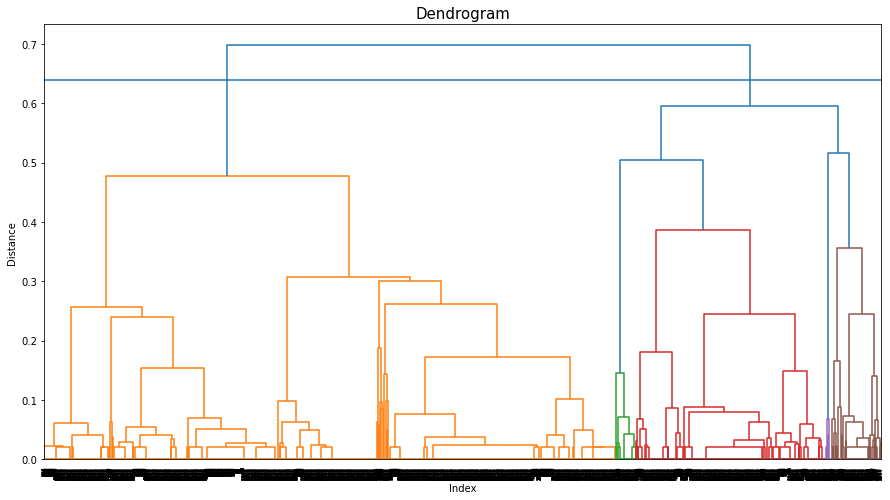

In [39]:
dendro = dendrogram(link_mat)

for i,d,c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]   
    
    if y > 20:
        
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
        
plt.axhline(y = 0.64)
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 10)
plt.ylabel('Distance', fontsize = 10)
plt.show()

In [40]:
distance_ec = euclidean_distances(h_data)
coeff, cophenet_dist = cophenet(link_mat, pdist(h_data))
print(coeff)

0.7770150863240503


<a id='SSC'></a>
#### 5.2.1 Silhouette Score Method

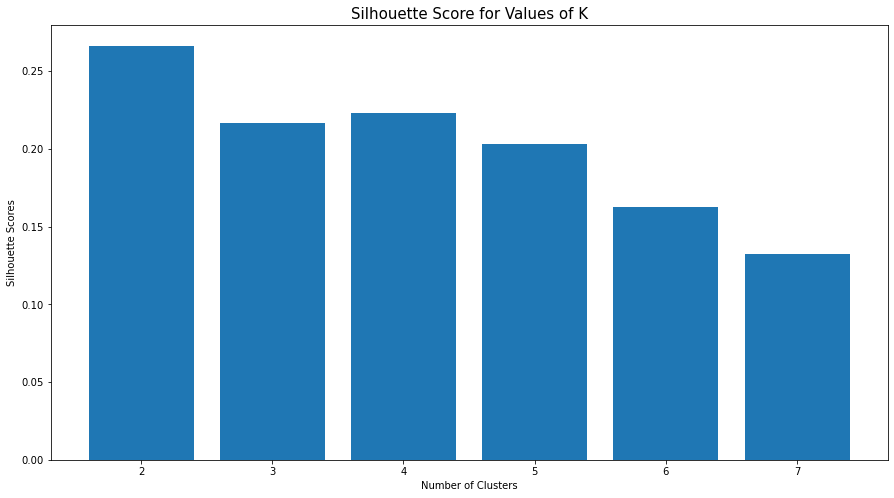

In [75]:
K = [2,3,4,5,6,7]
silhouette_scores = [] 

for i in K:
    model = AgglomerativeClustering(n_clusters = i) 
    silhouette_scores.append(silhouette_score(data_scaled, model.fit_predict(h_data))) 

plt.bar(K, silhouette_scores) 
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Scores', fontsize = 10)
plt.show()

In [47]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='average')
clusters.fit(data_scaled)

AgglomerativeClustering(linkage='average')

In [48]:
data['hier_Cluster'] = clusters.labels_

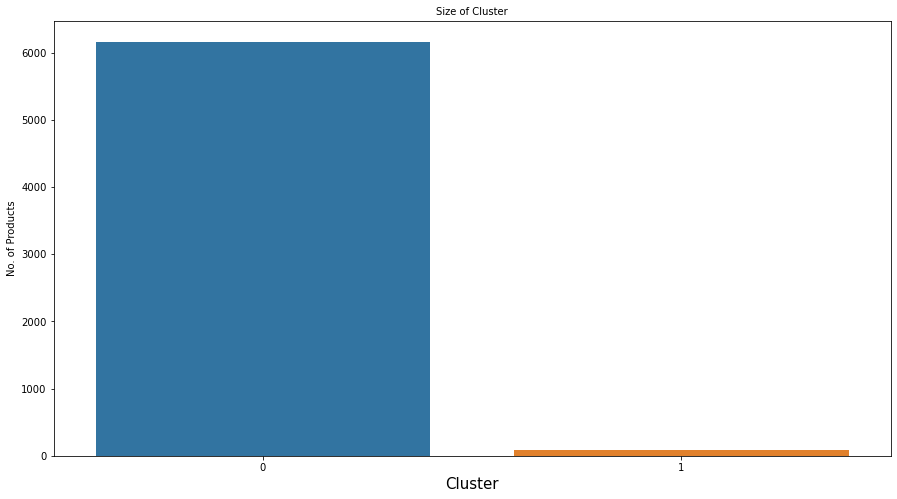

In [49]:
sns.countplot(data = data, x = 'hier_Cluster')

plt.title('Size of Cluster', fontsize = 10)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 10)

plt.show()

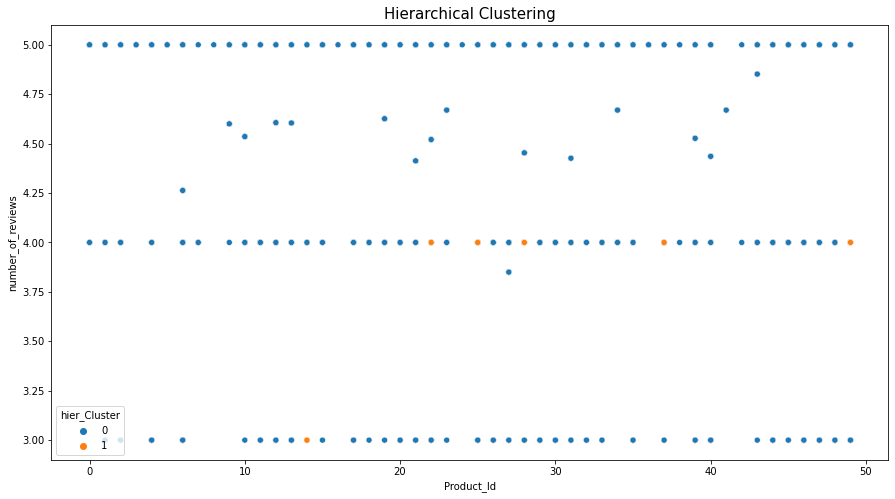

In [50]:
sns.scatterplot(x = 'Product_Id', y = 'reviews.rating', data = data, hue = 'hier_Cluster')

plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Product_Id', fontsize = 10)
plt.ylabel('number_of_reviews', fontsize = 10)

plt.show()

<a id='CA1'></a>
#### 5.2.2 Analysis of Cluster 0

In [51]:
data['hier_Cluster'].value_counts()[0]

6163

In [52]:
data[data.hier_Cluster==0].describe()

count        mean         std      min         25%  \
reviews.numHelpful 6163.000000    0.439396    0.550311 0.000000    0.000000   
reviews.rating     6163.000000    4.618386    0.599003 3.000000    4.000000   
user_Id            6163.000000 2729.877008 1600.779883 0.000000 1358.500000   
Product_Id         6163.000000   25.978257   13.131652 0.000000   14.000000   
kmeans_cluster     6163.000000    3.421710    2.077412 0.000000    2.000000   
hier_Cluster       6163.000000    0.000000    0.000000 0.000000    0.000000   

                           50%         75%         max  
reviews.numHelpful    0.000000    1.000000    2.000000  
reviews.rating        5.000000    5.000000    5.000000  
user_Id            2708.000000 4088.500000 5581.000000  
Product_Id           29.000000   35.000000   49.000000  
kmeans_cluster        4.000000    6.000000    6.000000  
hier_Cluster          0.000000    0.000000    0.000000

In [53]:
data[data.hier_Cluster==0].describe(include = object)

count unique  \
id                6163     50   
brand             6163     38   
categories        6163     49   
name              6163     50   
reviews.text      6163   6080   
reviews.title     6163   4591   
reviews.username  6163   5514   

                                                                top  freq  
id                                             AVpgfP3DilAPnD_xtG3M  1327  
brand                                                      Logitech  1414  
categories        Electronics,Accessories & Supplies,Audio & Vid...  1327  
name              Logitech 915-000224  Harmony Ultimate One 15-D...  1327  
reviews.text      Using this with a Sony BD player and Onkyo 5.1...     7  
reviews.title                                            Five Stars   135  
reviews.username                                  ByAmazon Customer    47

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
Interpretation: In cluster 0 average rating for products is 4.9 having 4259 unique review and 5 star rating is give 133 time.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='CA2'></a>
#### 5.2.3 Analysis of Cluster 1

In [54]:
data['hier_Cluster'].value_counts()[1]

80

In [55]:
data[data.hier_Cluster==1].describe()

count        mean         std       min         25%  \
reviews.numHelpful 80.000000    2.000000    0.000000  2.000000    2.000000   
reviews.rating     80.000000    3.825000    0.382364  3.000000    4.000000   
user_Id            80.000000 2743.687500 1577.615887 73.000000 1711.250000   
Product_Id         80.000000   20.812500   11.632662  1.000000   12.000000   
kmeans_cluster     80.000000    3.675000    1.473607  0.000000    3.000000   
hier_Cluster       80.000000    1.000000    0.000000  1.000000    1.000000   

                           50%         75%         max  
reviews.numHelpful    2.000000    2.000000    2.000000  
reviews.rating        4.000000    4.000000    4.000000  
user_Id            2620.500000 4220.250000 5529.000000  
Product_Id           21.000000   28.000000   49.000000  
kmeans_cluster        4.000000    5.000000    5.000000  
hier_Cluster          1.000000    1.000000    1.000000

In [56]:
data[data.hier_Cluster==1].describe(include = object).T

count unique  \
id                  80     24   
brand               80     20   
categories          80     24   
name                80     24   
reviews.text        80     79   
reviews.title       80     76   
reviews.username    80     77   

                                                                top freq  
id                                             AVpf3txeLJeJML43FN82   12  
brand                                                     Microsoft   12  
categories        Electronics,Computers,Computer Accessories,Key...   12  
name              Microsoft Surface Pro 4 Type Cover with Finger...   12  
reviews.text      Good sound that will fill a small room. Not as...    2  
reviews.title                                                 Great    2  
reviews.username                                              EricV    3

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
Interpretation: In cluster 1 average rating for products is 3.7 having 1909 unique review and 4 star rating is given 34 time.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='DBSCAN'></a>
## 5.3 DBSCAN

In [57]:
model = DBSCAN(eps = 0.5, min_samples = 15)
model.fit(data_scaled)

DBSCAN(min_samples=15)

In [58]:
(set(model.labels_))

{-1, 0}

In [59]:
data['Cluster_DBSCAN'] = model.labels_

In [60]:
data['Cluster_DBSCAN'].value_counts()

 0    6229
-1      14
Name: Cluster_DBSCAN, dtype: int64

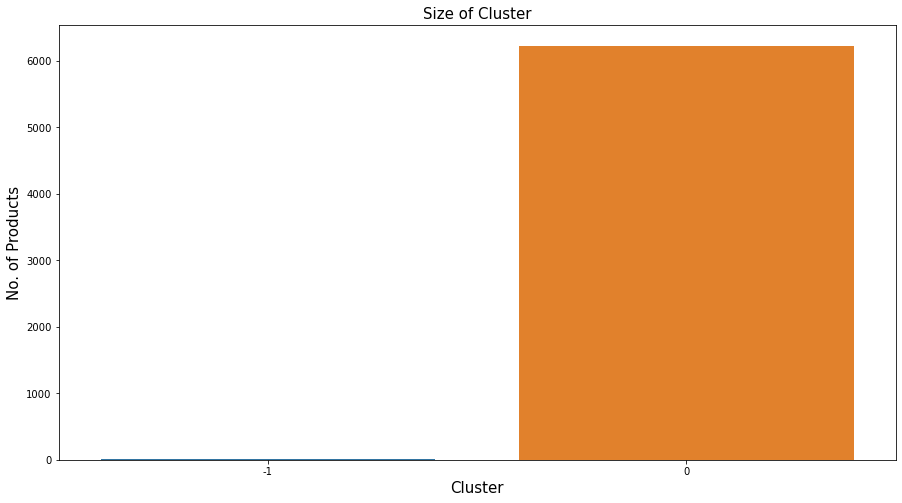

In [61]:
sns.countplot(data = data, x = 'Cluster_DBSCAN')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)
plt.show()

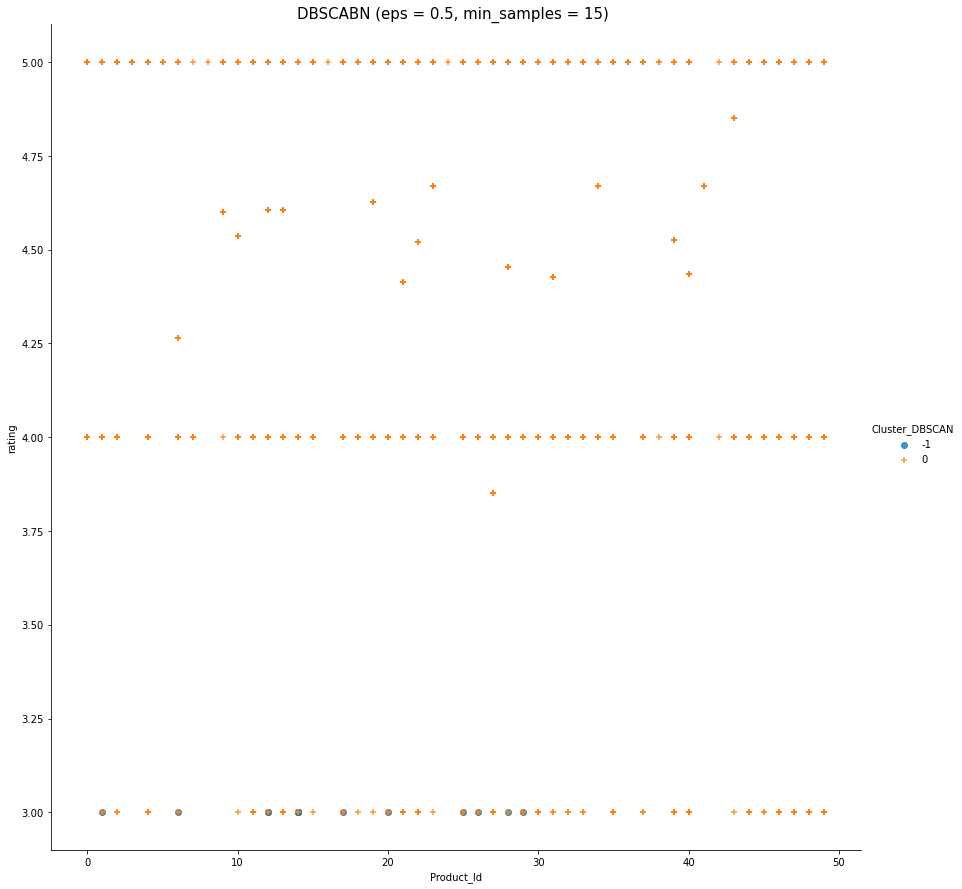

In [62]:
sns.lmplot(x = 'Product_Id', y = 'reviews.rating', data = data, hue = 'Cluster_DBSCAN', markers = ['o','+'], 
           fit_reg = False, size = 12)

plt.title('DBSCABN (eps = 0.5, min_samples = 15) ', fontsize = 15)
plt.xlabel('Product_Id', fontsize = 10)
plt.ylabel('rating', fontsize = 10)

plt.show()

In [63]:
data[data.Cluster_DBSCAN==0]['name'].value_counts()[:5]

Logitech 915-000224  Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black    1330
Sony SRSXB30/BLK XB30 Portable Wireless Speaker with Bluetooth                                                                   462
Microsoft Surface Pro 4 Type Cover with Fingerprint ID                                                                           371
Everest Elite 700 Around-Ear Wireless Headphones (White)                                                                         298
Slingbox M2                                                                                                                      298
Name: name, dtype: int64

In [64]:
data[data.Cluster_DBSCAN==-1]['name'].value_counts()

Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black                                                                         4
Microsoft Surface Pro 4 Type Cover with Fingerprint ID                                                                          2
Slingbox M2                                                                                                                     1
SRS-ZR7 Wireless Speaker                                                                                                        1
Everest Elite 700 Around-Ear Wireless Headphones (White)                                                                        1
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                     1
Logitech 915-000224  Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black    1
Alpine                                                                                    

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
Interpretation:  From the above output we can see that the DBSCAN algorithm has created 2 clusters. The data points labeled as -1 are the outliers identified by DBSCAN.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='BRS'></a>
# **6. Building Recommendation Systems**

<a id='PB'></a>
## 6.1 Popularity Based Recommendation

In [119]:
pd.DataFrame(data.groupby('name')['reviews.rating'].mean().sort_values(ascending=False)).head(15)

reviews.rating
name                                                              
Toshiba Micro Component Speaker System: Wireles...        5.000000
Prime Three-Way Center Channel Speaker (Premium...        5.000000
Clarity - Super-Loud Phone Ringer - White                 5.000000
DreamWave - Tremor Portable Bluetooth Speaker -...        5.000000
Kicker 41IK5BT2V2 Amphitheater High-Performance...        5.000000
House of Marley EM-DH003-PS TTR Noise-Cancellin...        5.000000
AW6500 All-Weather Outdoor Speaker (White, Single)        4.902646
Logitech G403 Wireless Gaming Mouse with High P...        4.862069
Acoustimass 6 Series V Home Theater Speaker Sys...        4.833333
Sony Mini Digital Video Cassettes - DVC - 1 Hour          4.830000
Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chann...        4.822430
2TB Red 5400 rpm SATA III 3.5 Internal NAS HDD            4.816327
Bowers & Wilkins P7 Wired Over Ear Headphones             4.803030
PNY Anarchy 16GB Kit (2x8GB) DDR4 2400MHz (PC4-...        4.796610
JBL - 6" x 8" 2-Way Coaxial Car Speakers with P...        4.765957

In [120]:
popularity_table=data.groupby('name').agg({'reviews.rating':'mean','reviews.numHelpful':'count'})

In [121]:
popularity_table['rating_per_count']=popularity_table['reviews.rating']/popularity_table['reviews.numHelpful']
popularity_table.sort_values('rating_per_count',ascending=False)[:5]

reviews.rating  \
name                                                                 
DreamWave - Tremor Portable Bluetooth Speaker -...        5.000000   
Prime Three-Way Center Channel Speaker (Premium...        5.000000   
House of Marley EM-DH003-PS TTR Noise-Cancellin...        5.000000   
The Rebel BT On-Ear Wireless Bluetooth Headphon...        4.500000   
Kicker 41IK5BT2V2 Amphitheater High-Performance...        5.000000   

                                                    reviews.numHelpful  \
name                                                                     
DreamWave - Tremor Portable Bluetooth Speaker -...                   1   
Prime Three-Way Center Channel Speaker (Premium...                   1   
House of Marley EM-DH003-PS TTR Noise-Cancellin...                   1   
The Rebel BT On-Ear Wireless Bluetooth Headphon...                   2   
Kicker 41IK5BT2V2 Amphitheater High-Performance...                   3   

                                                    rating_per_count  
name                                                                  
DreamWave - Tremor Portable Bluetooth Speaker -...          5.000000  
Prime Three-Way Center Channel Speaker (Premium...          5.000000  
House of Marley EM-DH003-PS TTR Noise-Cancellin...          5.000000  
The Rebel BT On-Ear Wireless Bluetooth Headphon...          2.250000  
Kicker 41IK5BT2V2 Amphitheater High-Performance...          1.666667

In [122]:
top_popularity_table=popularity_table[popularity_table['reviews.numHelpful']>100]
top_popularity_table[:5]

reviews.rating  \
name                                                                 
AW6500 All-Weather Outdoor Speaker (White, Single)        4.902646   
Alpine                                                    4.485104   
Alpine - 6-1/2" 2-Way Coaxial Car Speakers with...        4.671826   
Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chann...        4.822430   
Everest Elite 700 Around-Ear Wireless Headphone...        4.535117   

                                                    reviews.numHelpful  \
name                                                                     
AW6500 All-Weather Outdoor Speaker (White, Single)                 105   
Alpine                                                             106   
Alpine - 6-1/2" 2-Way Coaxial Car Speakers with...                 246   
Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chann...                 107   
Everest Elite 700 Around-Ear Wireless Headphone...                 299   

                                                    rating_per_count  
name                                                                  
AW6500 All-Weather Outdoor Speaker (White, Single)          0.046692  
Alpine                                                      0.042312  
Alpine - 6-1/2" 2-Way Coaxial Car Speakers with...          0.018991  
Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chann...          0.045069  
Everest Elite 700 Around-Ear Wireless Headphone...          0.015168

In [123]:
print('The top five popular products reviewd by the users are:\n')
top_popularity_table.sort_values('reviews.rating',ascending=False).head()

The top five popular products reviewd by the users are:



reviews.rating  \
name                                                                 
AW6500 All-Weather Outdoor Speaker (White, Single)        4.902646   
Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chann...        4.822430   
PNY Anarchy 16GB Kit (2x8GB) DDR4 2400MHz (PC4-...        4.796610   
Flipside 300 Backpack (Black)                             4.724092   
XPS 8920 Tower Desktop Computer                           4.714286   

                                                    reviews.numHelpful  \
name                                                                     
AW6500 All-Weather Outdoor Speaker (White, Single)                 105   
Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chann...                 107   
PNY Anarchy 16GB Kit (2x8GB) DDR4 2400MHz (PC4-...                 177   
Flipside 300 Backpack (Black)                                      125   
XPS 8920 Tower Desktop Computer                                    105   

                                                    rating_per_count  
name                                                                  
AW6500 All-Weather Outdoor Speaker (White, Single)          0.046692  
Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Chann...          0.045069  
PNY Anarchy 16GB Kit (2x8GB) DDR4 2400MHz (PC4-...          0.027099  
Flipside 300 Backpack (Black)                               0.037793  
XPS 8920 Tower Desktop Computer                             0.044898

<a id='CB'></a>
## 6.2 Content Based Recommendation

In [124]:
categories=data['categories'].str.split(',',expand=True)
categories=categories.iloc[:,0:3]
categories.head()

0          1                     2
0  Electronics  Computers  Computer Accessories
1  Electronics  Computers  Computer Accessories
2  Electronics  Computers  Computer Accessories
3  Electronics  Computers  Computer Accessories
4  Electronics  Computers  Computer Accessories

In [125]:
categories.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [126]:
categories.columns=['category','sub_category_1','sub_category_2']
categories.head(2)

category sub_category_1        sub_category_2
0  Electronics      Computers  Computer Accessories
1  Electronics      Computers  Computer Accessories

In [127]:
data1=pd.concat([data,categories],axis=1)
data1.head()

id      brand  \
0  AVpf3txeLJeJML43FN82  Microsoft   
1  AVpf3txeLJeJML43FN82  Microsoft   
2  AVpf3txeLJeJML43FN82  Microsoft   
3  AVpf3txeLJeJML43FN82  Microsoft   
4  AVpf3txeLJeJML43FN82  Microsoft   

                                          categories  \
0  Electronics,Computers,Computer Accessories,Key...   
1  Electronics,Computers,Computer Accessories,Key...   
2  Electronics,Computers,Computer Accessories,Key...   
3  Electronics,Computers,Computer Accessories,Key...   
4  Electronics,Computers,Computer Accessories,Key...   

                                                name  reviews.numHelpful  \
0  Microsoft Surface Pro 4 Type Cover with Finger...            2.000000   
1  Microsoft Surface Pro 4 Type Cover with Finger...            2.000000   
2  Microsoft Surface Pro 4 Type Cover with Finger...            1.000000   
3  Microsoft Surface Pro 4 Type Cover with Finger...            1.000000   
4  Microsoft Surface Pro 4 Type Cover with Finger...            2.000000   

   reviews.rating                                       reviews.text  \
0        5.000000  This keyboard is very easy to type on, but the...   
1        5.000000  purchased to replace original surface pro 3 ke...   
2        3.000000  Good Keyboard and addition to the Surface Pro ...   
3        5.000000  A must have accessory for the surface pro comp...   
4        4.000000  Fingerprint scanner for that price is not wort...   

                 reviews.title reviews.username  user_Id  Product_Id  \
0  Love the fingerprint reader             JNH1     2099          12   
1              big improvement       gjohnsonxc     4684          12   
2                Good Keyboard            Angie      166          12   
3                    Must have      hooverlover     4745          12   
4          not worth the price           lundi3     4980          12   

   kmeans_cluster     category sub_category_1        sub_category_2  
0               2  Electronics      Computers  Computer Accessories  
1               2  Electronics      Computers  Computer Accessories  
2               4  Electronics      Computers  Computer Accessories  
3               2  Electronics      Computers  Computer Accessories  
4               5  Electronics      Computers  Computer Accessories

In [128]:
data_feat=data1[['name','category','sub_category_1','sub_category_2','reviews.rating']]
data_feat.head()

name     category  \
0  Microsoft Surface Pro 4 Type Cover with Finger...  Electronics   
1  Microsoft Surface Pro 4 Type Cover with Finger...  Electronics   
2  Microsoft Surface Pro 4 Type Cover with Finger...  Electronics   
3  Microsoft Surface Pro 4 Type Cover with Finger...  Electronics   
4  Microsoft Surface Pro 4 Type Cover with Finger...  Electronics   

  sub_category_1        sub_category_2  reviews.rating  
0      Computers  Computer Accessories        5.000000  
1      Computers  Computer Accessories        5.000000  
2      Computers  Computer Accessories        3.000000  
3      Computers  Computer Accessories        5.000000  
4      Computers  Computer Accessories        4.000000

In [129]:
data_feat.shape

(6243, 5)

In [130]:
data_feat=data_feat.drop_duplicates()
data_feat.shape

(146, 5)

In [131]:
data_feat.index=data_feat['name']

In [132]:
data_feat=data_feat.drop('name',axis=1)
data_feat.head()

category  \
name                                                              
Microsoft Surface Pro 4 Type Cover with Fingerp...  Electronics   
Microsoft Surface Pro 4 Type Cover with Fingerp...  Electronics   
Microsoft Surface Pro 4 Type Cover with Fingerp...  Electronics   
Microsoft Surface Pro 4 Type Cover with Fingerp...  Electronics   
Boytone - 2500W 2.1-Ch. Home Theater System - B...  Electronics   

                                                            sub_category_1  \
name                                                                         
Microsoft Surface Pro 4 Type Cover with Fingerp...               Computers   
Microsoft Surface Pro 4 Type Cover with Fingerp...               Computers   
Microsoft Surface Pro 4 Type Cover with Fingerp...               Computers   
Microsoft Surface Pro 4 Type Cover with Fingerp...               Computers   
Boytone - 2500W 2.1-Ch. Home Theater System - B...  Portable Audio & Video   

                                                          sub_category_2  \
name                                                                       
Microsoft Surface Pro 4 Type Cover with Fingerp...  Computer Accessories   
Microsoft Surface Pro 4 Type Cover with Fingerp...  Computer Accessories   
Microsoft Surface Pro 4 Type Cover with Fingerp...  Computer Accessories   
Microsoft Surface Pro 4 Type Cover with Fingerp...  Computer Accessories   
Boytone - 2500W 2.1-Ch. Home Theater System - B...  Home Audio & Theater   

                                                    reviews.rating  
name                                                                
Microsoft Surface Pro 4 Type Cover with Fingerp...        5.000000  
Microsoft Surface Pro 4 Type Cover with Fingerp...        3.000000  
Microsoft Surface Pro 4 Type Cover with Fingerp...        4.000000  
Microsoft Surface Pro 4 Type Cover with Fingerp...        4.606061  
Boytone - 2500W 2.1-Ch. Home Theater System - B...        5.000000

In [133]:
data3=pd.get_dummies(data_feat)

In [142]:
rec_model = NearestNeighbors(metric = 'cosine')
rec_model.fit(data3)

NearestNeighbors(metric='cosine')

In [143]:
query_product_index=12
dist, ind = rec_model.kneighbors(data3.iloc[query_product_index, :].values.reshape(1, -1), n_neighbors = 9)

In [144]:
list(data3.index[ind[0]])[3:]

['Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetooth Speaker with hands-free Amazon Alexa voice control (waterproof) - Graphite Black',
 'iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC)',
 'Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black',
 'SRS-ZR7 Wireless Speaker',
 'Sony SRSXB30/BLK XB30 Portable Wireless Speaker with Bluetooth',
 'Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black']

In [145]:
for i in range(3, len(dist[0])):
    if i == 3:
        print('Top 5 Recommendations for the user who reviewed the product :\n',data3.index[query_product_index])
    else:
        print(data3.index[ind[0][i]])

Top 5 Recommendations for the user who reviewed the product :
 Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetooth Speaker with hands-free Amazon Alexa voice control (waterproof) - Graphite Black
iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC)
Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black
SRS-ZR7 Wireless Speaker
Sony SRSXB30/BLK XB30 Portable Wireless Speaker with Bluetooth
Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black


<a id='CF'></a>
## 6.3 Collaborative Filtering

In [56]:
reader = Reader(rating_scale=(1, 5))
data.head(1)

id      brand  \
0  AVpf3txeLJeJML43FN82  Microsoft   

                                          categories  \
0  Electronics,Computers,Computer Accessories,Key...   

                                                name  reviews.numHelpful  \
0  Microsoft Surface Pro 4 Type Cover with Finger...            2.000000   

   reviews.rating                                       reviews.text  \
0        5.000000  This keyboard is very easy to type on, but the...   

                 reviews.title reviews.username  user_Id  Product_Id  \
0  Love the fingerprint reader             JNH1     2099          12   

   kmeans_cluster  
0               1

In [57]:
rating_data = Dataset.load_from_df(data[['user_Id','name','reviews.rating']],reader)
[trainset, testset] = train_test_split(rating_data, test_size=.15,shuffle=True)

In [58]:
trainsetfull = rating_data.build_full_trainset()
print('Number of users: ', trainsetfull.n_users, '\n')
print('Number of items: ', trainsetfull.n_items, '\n')

Number of users:  5582 

Number of items:  50 



In [59]:
my_k = 15
my_min_k = 5
my_sim_option = {'name':'pearson', 'user_based':False}

In [60]:
algo = KNNWithMeans(k = my_k, min_k = my_min_k, sim_options = my_sim_option, verbose = True)

In [61]:
results = cross_validate(algo = algo, data = rating_data, measures=['RMSE'], cv=5, return_train_measures=True  )

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [62]:
print(results['test_rmse'].mean())

0.6024142245561517


In [63]:
alg=SVDpp()
alg.fit(trainsetfull)

In [64]:
algo.fit(trainsetfull)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [65]:
algo.predict(uid = 50, iid =2)

Prediction(uid=50, iid=2, r_ui=None, est=4.608219651323199, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [66]:
item_id=data['name'].unique()
item_id10=data.loc[data['user_Id']==10,'Product_Id']
item_id_pred=np.setdiff1d(item_id,item_id10)

In [67]:
item_id_pred

array(['2TB Red 5400 rpm SATA III 3.5 Internal NAS HDD',
       'AW6500 All-Weather Outdoor Speaker (White, Single)',
       'Acoustimass 6 Series V Home Theater Speaker System (Black)',
       'Air-Fi Runaway AF32 Stereo Bluetooth Wireless Headphones with Hidden Microphone (White)',
       'Alpine',
       'Alpine - 6-1/2" 2-Way Coaxial Car Speakers with Polypropylene Cones (Pair) - Black',
       'Bowers & Wilkins P7 Wired Over Ear Headphones',
       'Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond',
       'CRX-322 CD Receiver', 'Clarity - Super-Loud Phone Ringer - White',
       'Corsair CMSA8GX3M2A1066C7 Apple 8 GB Dual Channel Kit DDR3 1066 (PC3 8500) 204-Pin DDR3 Laptop SO-DIMM Memory 1.5V',
       'DreamWave - Tremor Portable Bluetooth Speaker - Green,Black',
       'Everest Elite 700 Around-Ear Wireless Headphones (White)',
       'Flipside 300 Backpack (Black)',
       'House of Marley EM-DH003-PS TTR Noise-Cancelling Over-Ear Headphones (Black)',
       'JBL - 6

In [68]:
testset=[[50,iid,4] for iid in item_id_pred]
pred=alg.test(testset)

In [69]:
pred_ratings=np.array([pred1.est for pred1 in pred])
i_max=pred_ratings.argmax()
iid=item_id_pred[i_max]
print("Top item for user 10 has iid {0} with predicted rating {1}".format(iid,pred_ratings[i_max]))

Top item for user 10 has iid Clarity - Super-Loud Phone Ringer - White with predicted rating 4.959839627785311


<a id='HR'></a>
## 6.4 Hybrid Recommendation System

In [29]:
ratings=data[['Product_Id','user_Id','reviews.rating']]

In [30]:
ratings=ratings.drop_duplicates(subset=['user_Id','Product_Id'])

In [31]:
ratings.head()

Product_Id  user_Id  reviews.rating
0          12     2099        5.000000
1          12     4684        5.000000
2          12      166        3.000000
3          12     4745        5.000000
4          12     4980        4.000000

In [32]:
ratings['reviews.rating'].value_counts()

5.000000    3981
4.000000    1491
3.000000     391
4.669565      17
4.535714      11
4.263158      11
4.526923      10
4.851852       9
4.604478       8
4.606061       8
4.520693       8
4.625954       7
4.453333       7
4.426190       6
4.412903       5
4.435714       5
4.600000       5
3.850000       4
Name: reviews.rating, dtype: int64

In [33]:
products=data[['Product_Id','name','categories']]
products.head()

Product_Id                                               name  \
0          12  Microsoft Surface Pro 4 Type Cover with Finger...   
1          12  Microsoft Surface Pro 4 Type Cover with Finger...   
2          12  Microsoft Surface Pro 4 Type Cover with Finger...   
3          12  Microsoft Surface Pro 4 Type Cover with Finger...   
4          12  Microsoft Surface Pro 4 Type Cover with Finger...   

                                          categories  
0  Electronics,Computers,Computer Accessories,Key...  
1  Electronics,Computers,Computer Accessories,Key...  
2  Electronics,Computers,Computer Accessories,Key...  
3  Electronics,Computers,Computer Accessories,Key...  
4  Electronics,Computers,Computer Accessories,Key...

In [34]:
trainDF, tempDF = train_test_split(ratings, test_size=0.2, random_state=100)

In [35]:
tempDF.head()

Product_Id  user_Id  reviews.rating
6161          29     5477        5.000000
4983          29     1033        3.000000
2538          47     2330        5.000000
303           12     4806        5.000000
2563          47     2175        5.000000

In [36]:
trainDF = trainDF.dropna()
trainDF.head()

Product_Id  user_Id  reviews.rating
3501          46      189        4.000000
2318          17     1995        5.000000
4122          39     3472        4.526923
1557          11     2625        5.000000
5764          29     1992        5.000000

In [37]:
ratings = pd.concat([trainDF, tempDF]).reset_index()
ratings.head()

index  Product_Id  user_Id  reviews.rating
0   3501          46      189        4.000000
1   2318          17     1995        5.000000
2   4122          39     3472        4.526923
3   1557          11     2625        5.000000
4   5764          29     1992        5.000000

In [38]:
ratings.drop_duplicates()

index  Product_Id  user_Id  reviews.rating
0      3501          46      189        4.000000
1      2318          17     1995        5.000000
2      4122          39     3472        4.526923
3      1557          11     2625        5.000000
4      5764          29     1992        5.000000
5        25          12     4160        5.000000
6      6059          29     2899        4.000000
7      6219          29     3422        5.000000
8      5714          29     4604        3.000000
9      3357          46     4128        5.000000
10     4187          39     4509        5.000000
11      638          49     4070        3.000000
12     5197          29      778        3.000000
13     2151          14     3720        4.000000
14     5849          29     2900        5.000000
15     4233          30     5556        4.000000
16     2724           4     4870        5.000000
17      769          19     2827        5.000000
18     1814          25     3137        4.000000
19      509          35      467        4.000000
20     2700           4     2035        5.000000
21      748          19     3738        5.000000
22     6034          29     1935        4.000000
23     5708          29     5577        5.000000
24     2464           6     4587        5.000000
25     1292          13     4876        3.000000
26     4255          30     2456        3.000000
27     5917          29     1898        4.000000
28     4701           1     1369        4.000000
29     4990          29      801        5.000000
30     5711          29     4400        4.000000
31     2976           4     5414        5.000000
32     1297          13     2765        5.000000
33     2000          25     2312        5.000000
34     5907          29      459        5.000000
35     1669          11     3090        5.000000
36     4570          20     2333        5.000000
37     6142          29     3213        5.000000
38     2540          47     3519        5.000000
39      295          12     2487        5.000000
40     6072          29     1643        5.000000
41      535          35      508        5.000000
42     3635          46     4153        5.000000
43     4423          20     5210        5.000000
44     5830          29     2879        5.000000
45     5491          29     2049        3.000000
46     5085          29      691        4.000000
47      902          26     2851        5.000000
48     5720          29     3107        5.000000
49     4649          15     2085        5.000000
50     5332          29     4302        5.000000
51     5770          29     2642        4.000000
52     5729          29      454        5.000000
53     5649          29     4519        4.000000
54     4530          20     3195        5.000000
55     5208          29      570        4.000000
56     1485          48     4152        5.000000
57     1049          40     3865        4.000000
58     1673          11     3111        5.000000
59     4092          39     3237        5.000000
60     6115          29     5313        4.000000
61     4314          37     2338        5.000000
62     2316          17     5315        3.000000
63      845           2     3809        4.000000
64     4482          20     4190        4.000000
65     5313          29      533        5.000000
66     4578          20     1224        5.000000
67     3633          46     3153        5.000000
68     3827          23     3353        5.000000
69     1662          11     3652        5.000000
70     4430          20     2500        5.000000
71     5674          29     3953        4.000000
72     2583          47     2458        5.000000
73       91          12     1456        4.000000
74     5611          29     3018        4.000000
75      991          26     1981        5.000000
76     5160          29      628        3.000000
77     2916           4      598        4.000000
78     4938          29      949        4.000000
79     1180          13     2261        5.000000
80     3510          46      308     

In [39]:
ratings2=ratings.pivot(index='Product_Id',columns='user_Id',values='reviews.rating').fillna(0)
ratings2.head()

user_Id        0        1        2        3        4        5        6     \
Product_Id                                                                  
0          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2          0.000000 0.000000 0.000000 5.000000 0.000000 0.000000 0.000000   
3          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
4          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

user_Id        7        8        9        10       11       12       13    \
Product_Id                                                                  
0          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
3          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
4          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

user_Id        14       15       16       17       18       19       20    \
Product_Id                                                                  
0          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
3          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
4          0.000000 0.000000 0.000000 5.000000 0.000000 0.000000 0.000000   

user_Id        21       22       23       24       25       26       27    \
Product_Id                                                                  
0          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
3          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
4          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5.000000   

user_Id        28       29       30       31       32       33       34    \
Product_Id                                                                  
0          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
3          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
4          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

user_Id        35       36       37       38       39       40       41    \
Product_Id                                                                  
0          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
3          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
4          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

user_Id        42       43       44       45       46       47       48    \
Product_Id                                                                  
0          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2          0.000000 0.000000 0.000000 0.000000 5.000000 0.000000 0.000000   
3          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
4          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 5.000000   

user_Id        49       50       51       52       53       54       55    \
Product_Id                                                                  
0          0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0

In [40]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=40,random_state=4)
svd.fit(ratings2)

TruncatedSVD(n_components=40, random_state=4)

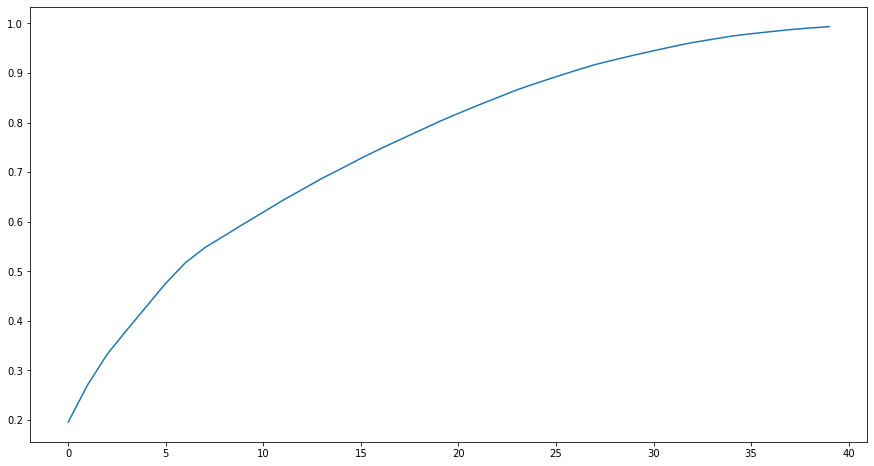

In [41]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.show()

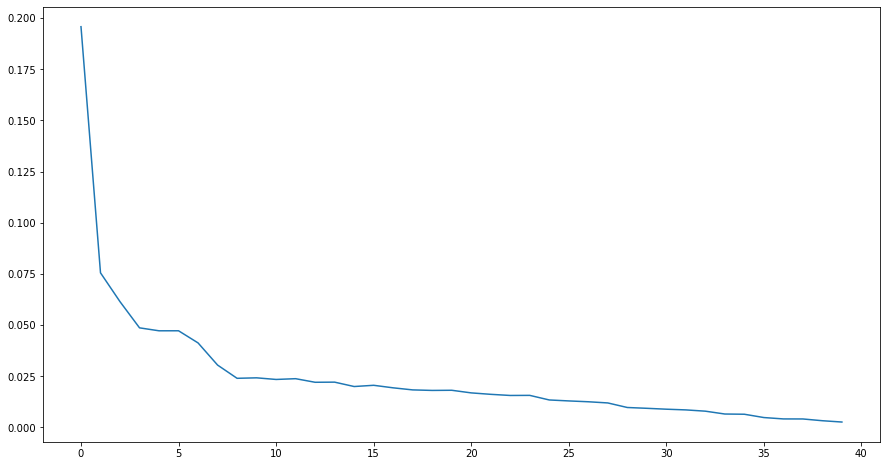

In [42]:
plt.plot((svd.explained_variance_ratio_))
plt.show()

In [43]:
ratings_svd=svd.fit_transform(ratings2)
ratings_svd.shape

(50, 40)

In [44]:
pid=ratings2.index

In [45]:
ratings_corr=np.corrcoef(ratings_svd)
ratings_corr=pd.DataFrame(ratings_corr,columns=pid,index=pid)
ratings_corr.head()

Product_Id        0         1         2         3         4         5   \
Product_Id                                                               
0           1.000000 -0.031776 -0.031603 -0.020244 -0.015201 -0.041346   
1          -0.031776  1.000000 -0.029667 -0.025336 -0.006936 -0.051351   
2          -0.031603 -0.029667  1.000000 -0.025953 -0.012291 -0.050993   
3          -0.020244 -0.025336 -0.025953  1.000000 -0.012284 -0.056564   
4          -0.015201 -0.006936 -0.012291 -0.012284  1.000000 -0.024726   

Product_Id        6        7         8         9         10        11  \
Product_Id                                                              
0          -0.019706 0.036980  0.069292 -0.028209 -0.025004 -0.023755   
1          -0.024421 0.070203  0.098318 -0.034959 -0.030987 -0.017531   
2          -0.024288 0.151765  0.131701 -0.034768 -0.012863 -0.021058   
3           0.722353 0.019251 -0.015323 -0.021742 -0.020934 -0.019429   
4          -0.004739 0.114652 -0.022283 -0.001169 -0.014823  0.005108   

Product_Id        12        13        14        15        16        17  \
Product_Id                                                               
0          -0.020476 -0.006061 -0.008997 -0.026726 -0.028334 -0.028958   
1          -0.022242 -0.002444  0.008395 -0.033121 -0.054389 -0.035886   
2           0.013985  0.001858  0.005376 -0.032940 -0.096915 -0.035691   
3          -0.016481 -0.006006 -0.007244 -0.021020 -0.216925 -0.024092   
4           0.021877 -0.003593 -0.000838 -0.006422 -0.036468  0.001283   

Product_Id        18        19        20        21       22        23  \
Product_Id                                                              
0          -0.038847 -0.021599 -0.030720 -0.022126 0.000718 -0.025641   
1          -0.038245 -0.010223 -0.027166 -0.027419 0.000890 -0.031776   
2          -0.028204 -0.009972 -0.032510 -0.027270 0.008855 -0.031603   
3          -0.030779 -0.017212 -0.024465 -0.017415 0.000255 -0.020244   
4          -0.016315 -0.007815  0.004150 -0.006035 0.012666 -0.015201   

Product_Id        24        25        26        27        28        29  \
Product_Id                                                               
0          -0.000959 -0.025958 -0.013714 -0.028172 -0.032914 -0.023510   
1          -0.026440  0.003964 -0.009979 -0.034912 -0.040789 -0.016667   
2           0.052459 -0.017094  0.008285 -0.020298 -0.040567 -0.008058   
3          -0.169638 -0.020769  0.611152 -0.023346 -0.027348 -0.018642   
4          -0.014870 -0.008687  0.002582 -0.016701 -0.012241  0.010805   

Product_Id        30        31        32        33        34        35  \
Product_Id                                                               
0          -0.026955 -0.026463 -0.034013 -0.036519 -0.027016 -0.010760   
1          -0.014538 -0.032794 -0.025787 -0.024774 -0.033480 -0.013335   
2          -0.033223 -0.032616 -0.041921 -0.033698 -0.033298 -0.004263   
3          -0.021174 -0.021614 -0.027114 -0.029022 -0.021826 -0.008790   
4          -0.015980 -0.015688 -0.020164 -0.021650 -0.016016  0.010206   

Product_Id       36        37        38        39        40        41  \
Product_Id                                                              
0          0.030271 -0.035819  0.006791 -0.030141 -0.045954 -0.050170   
1          0.126559 -0.024999 -0.019990 -0.026995 -0.042399 -0.062940   
2          0.064337 -0.030762  0.011231 -0.037149 -0.046594 -0.062910   
3          0.096345 -0.028990 -0.323790 -0.024165 -0.036491 -0.056300   
4          0.129866 -0.013012 -0.118425  0.001042 -0.008731 -0.030047   

Product_Id       42        43        44        45        46        47  \
Product_Id                                                              
0          0.007860 -0.024397 -0.025844 -0.045315 -0.017446 -0.034689   
1          0.054618 -0.005037 -0.032028 -0.034587 -0.005710 -0.025302   
2          0.052053 -0.019365 -0.031853 -0.032026  0.001240 -0.036243   
3          0.027751 -0.

In [46]:
def prod_rec(pid):
    rec=ratings_corr[ratings_corr.index==pid].T
    rec=rec.rename(columns={pid:'corr'})
    rec=rec.sort_values(by='corr',ascending=False)
    return(rec)

In [69]:
prod_index=12
product=prod_rec(prod_index).head()


In [70]:
prod_r=product.reset_index()
prod_r=prod_r.rename(columns={prod_r.columns[0]:'prod_id'})
prod_r

Product_Id  prod_id     corr
0                12 1.000000
1                38 0.244556
2                 8 0.069093
3                 7 0.046439
4                 4 0.021877

In [71]:
products=data[['Product_Id','brand','name']]
products.head()

Product_Id      brand                                               name
0          12  Microsoft  Microsoft Surface Pro 4 Type Cover with Finger...
1          12  Microsoft  Microsoft Surface Pro 4 Type Cover with Finger...
2          12  Microsoft  Microsoft Surface Pro 4 Type Cover with Finger...
3          12  Microsoft  Microsoft Surface Pro 4 Type Cover with Finger...
4          12  Microsoft  Microsoft Surface Pro 4 Type Cover with Finger...

In [72]:
products=products.drop_duplicates()

In [73]:
products.set_index('Product_Id',inplace=True)
products.head()

brand                                               name
Product_Id                                                                  
12              Microsoft  Microsoft Surface Pro 4 Type Cover with Finger...
28                Boytone  Boytone - 2500W 2.1-Ch. Home Theater System - ...
35                  Sanus  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
49          Ultimate Ears  Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetoo...
19                Lowepro                      Flipside 300 Backpack (Black)

In [74]:
for i in range(0, 5):
    if i == 0:
        print('Top Recommendations for the user who bought the product :\n',products.loc[prod_index])
    else:
        x=prod_r['prod_id']
        y=x[i]
        print(products.loc[y])

Top Recommendations for the user who bought the product :
 brand                                            Microsoft
name     Microsoft Surface Pro 4 Type Cover with Finger...
Name: 12, dtype: object
brand                                       Power Acoustik
name     Power Acoustik - Gothic Series 10" Dual-Voice-...
Name: 38, dtype: object
brand                                                  SVS
name     Prime Three-Way Center Channel Speaker (Premiu...
Name: 8, dtype: object
brand                                  Peerless-AV
name     Round LCD/Projector Ceiling Plate - Black
Name: 7, dtype: object
brand                                              Samsung
name     SAMSUNG 40'' Class FHD (1080P) Smart LED TV (U...
Name: 4, dtype: object


<a id='as'></a>
# Association Rule

# Apriori Algorithm

In [99]:
df=pd.DataFrame(data['categories'])
df.head()

categories
0  Electronics,Computers,Computer Accessories,Key...
1  Electronics,Computers,Computer Accessories,Key...
2  Electronics,Computers,Computer Accessories,Key...
3  Electronics,Computers,Computer Accessories,Key...
4  Electronics,Computers,Computer Accessories,Key...

In [100]:

unique_row_items = []
for index, row in df.iterrows():
    items_series = list(row.str.split(','))
    for item_serie in items_series:
        for item in item_serie:
            if item not in unique_row_items:
                unique_row_items.append(item)

unique_row_items

['Electronics',
 'Computers',
 'Computer Accessories',
 'Keyboards',
 ' Mice & Joysticks',
 'All Keyboards',
 'Computers & Accessories',
 'Computer Accessories & Peripherals',
 ' Mice & Accessories',
 'Computers & Tablets',
 'iPad & Tablet Accessories',
 'Tablet Cases',
 ' Covers & Keyboard Folios',
 'Computer Peripherals',
 'Keyboards Accessories',
 'Computers Features',
 'Cases',
 'Name Brands',
 'Microsoft',
 'Microsoft Surface',
 'Microsoft Surface Accessories',
 'Microsoft Surface Cases & Covers',
 'Microsoft Surface Tablets',
 'Frys',
 'Tablets',
 'Portable Audio & Video',
 'Home Audio & Theater',
 'Home Audio',
 'All Home Speakers',
 'Speaker Systems',
 'Consumer Electronics',
 'TV',
 ' Video & Home Audio',
 'Home Theater Systems',
 'See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...',
 'Audio',
 'Stereos',
 'Speakers',
 'Cell',
 'MP3 Player Accessories',
 'Portable Bluetooth Speakers',
 'See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...',
 'Audio & Video Access

In [101]:
df_apriori = pd.DataFrame(columns=unique_row_items)
df_apriori

Empty DataFrame
Columns: [Electronics, Computers, Computer Accessories, Keyboards,  Mice & Joysticks, All Keyboards, Computers & Accessories, Computer Accessories & Peripherals,  Mice & Accessories, Computers & Tablets, iPad & Tablet Accessories, Tablet Cases,  Covers & Keyboard Folios, Computer Peripherals, Keyboards Accessories, Computers Features, Cases, Name Brands, Microsoft, Microsoft Surface, Microsoft Surface Accessories, Microsoft Surface Cases & Covers, Microsoft Surface Tablets, Frys, Tablets, Portable Audio & Video, Home Audio & Theater, Home Audio, All Home Speakers, Speaker Systems, Consumer Electronics, TV,  Video & Home Audio, Home Theater Systems, See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo..., Audio, Stereos, Speakers, Cell, MP3 Player Accessories, Portable Bluetooth Speakers, See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3..., Audio & Video Accessories, TV Mounts, TV Accessories & Parts, A/V Presentation, Accessories & Supplies, TV Ceiling & Wall Mounts, Bluetooth & Wireless Speakers, Portable Speakers & Docks, All Bluetooth & Wireless Speakers, Photography, Photography Bags Cases, Camera Bags, Backpacks, Backpacks ffvzrevebzuqvcddwzzxeuwva, Cameras & Camcorders, Digital Camera Accessories,  Cases & Straps, Camera Backpacks, Camera Accessories, Camera Bags & Cases, Bag & Case Accessories, Camera & Photo Features, Camera & Photo, Bags & Cases, Camera Cases, Outdoor Recreation, Hiking Daypacks, Backpacking Packs, Memory (RAM), Computer Components, Memory, Memory Upgrades, Computer Cards & Components, Laptop Memory, Portable Audio, Portable Wireless & Bluetooth Speakers, Wireless and Bluetooth Speakers, Wireless & Portable Bluetooth Speakers, Computer Speakers, Networking, Home Networking & Connectivity, See more Novatel Jetpack MiFi 6620l Hotspot 4G LTE Veri..., Cell Phones, Cell Phone Accessories, Mobile Broadband, Mobile Broadband Devices, Access Points,  Hubs & Switches, Computers/Tablets & Networking, Verizon Hotspots, Mobile Hotspots, Cell Phones & Accessories, Auto & Tires, Auto Electronics, Car Receivers, All In-Dash Stereos, Car & Vehicle Electronics, Car Electronics, ...]
Index: []

In [102]:

for index, row in df.iterrows():
    items = str(row[0]).split(',')
    one_hot_encoding = np.zeros(len(unique_row_items),dtype=int)
    for it in items:
        for i,column in enumerate(df_apriori.columns):
            if it == column:
                one_hot_encoding[i] = 1
    df_apriori.at[index] = one_hot_encoding
    


In [103]:
df_apriori=df_apriori.astype('int')

In [104]:
freq_items = apriori(df_apriori, min_support = 0.3, use_colnames = True, verbose = 1)

Processing 18 combinations | Sampling itemset size 3


In [105]:
freq_items

support                                      itemsets
0  0.969566                                 (Electronics)
1  0.394041                        (Consumer Electronics)
2  0.304821                                       (Audio)
3  0.308345                                  (TV & Video)
4  0.374339                           (TVs Entertainment)
5  0.377062           (Electronics, Consumer Electronics)
6  0.304821                          (Electronics, Audio)
7  0.308345                     (Electronics, TV & Video)
8  0.374339              (Electronics, TVs Entertainment)
9  0.308345               (TVs Entertainment, TV & Video)
10 0.308345  (Electronics, TVs Entertainment, TV & Video)

In [109]:
df_association_rules = association_rules(freq_items, metric = "confidence",min_threshold=0.3)
df_association_rules

antecedents                       consequents  \
0                      (Electronics)            (Consumer Electronics)   
1             (Consumer Electronics)                     (Electronics)   
2                      (Electronics)                           (Audio)   
3                            (Audio)                     (Electronics)   
4                      (Electronics)                      (TV & Video)   
5                       (TV & Video)                     (Electronics)   
6                      (Electronics)               (TVs Entertainment)   
7                (TVs Entertainment)                     (Electronics)   
8                (TVs Entertainment)                      (TV & Video)   
9                       (TV & Video)               (TVs Entertainment)   
10  (Electronics, TVs Entertainment)                      (TV & Video)   
11         (Electronics, TV & Video)               (TVs Entertainment)   
12   (TVs Entertainment, TV & Video)                     (Electronics)   
13                     (Electronics)   (TVs Entertainment, TV & Video)   
14               (TVs Entertainment)         (Electronics, TV & Video)   
15                      (TV & Video)  (Electronics, TVs Entertainment)   

    antecedent support  consequent support  support  confidence     lift  \
0             0.969566            0.394041 0.377062    0.388898 0.986947   
1             0.394041            0.969566 0.377062    0.956911 0.986947   
2             0.969566            0.304821 0.304821    0.314390 1.031389   
3             0.304821            0.969566 0.304821    1.000000 1.031389   
4             0.969566            0.308345 0.308345    0.318024 1.031389   
5             0.308345            0.969566 0.308345    1.000000 1.031389   
6             0.969566            0.374339 0.374339    0.386090 1.031389   
7             0.374339            0.969566 0.374339    1.000000 1.031389   
8             0.374339            0.308345 0.308345    0.823706 2.671374   
9             0.308345            0.374339 0.308345    1.000000 2.671374   
10            0.374339            0.308345 0.308345    0.823706 2.671374   
11            0.308345            0.374339 0.308345    1.000000 2.671374   
12            0.308345            0.969566 0.308345    1.000000 1.031389   
13            0.969566            0.308345 0.308345    0.318024 1.031389   
14            0.374339            0.308345 0.308345    0.823706 2.671374   
15            0.308345            0.374339 0.308345    1.000000 2.671374   

    leverage  conviction  
0  -0.004987    0.991584  
1  -0.004987    0.706300  
2   0.009277    1.013956  
3   0.009277         inf  
4   0.009384    1.014192  
5   0.009384         inf  
6   0.011393    1.019140  
7   0.011393         inf  
8   0.192920    3.923294  
9   0.192920         inf  
10  0.192920    3.923294  
11  0.192920         inf  
12  0.009384         inf  
13  0.009384    1.014192  
14  0.192920    3.923294  
15  0.192920         inf

In [110]:
df_association_rules.sort_values("confidence",ascending=False)

antecedents                       consequents  \
3                            (Audio)                     (Electronics)   
5                       (TV & Video)                     (Electronics)   
7                (TVs Entertainment)                     (Electronics)   
9                       (TV & Video)               (TVs Entertainment)   
11         (Electronics, TV & Video)               (TVs Entertainment)   
12   (TVs Entertainment, TV & Video)                     (Electronics)   
15                      (TV & Video)  (Electronics, TVs Entertainment)   
1             (Consumer Electronics)                     (Electronics)   
8                (TVs Entertainment)                      (TV & Video)   
10  (Electronics, TVs Entertainment)                      (TV & Video)   
14               (TVs Entertainment)         (Electronics, TV & Video)   
0                      (Electronics)            (Consumer Electronics)   
6                      (Electronics)               (TVs Entertainment)   
4                      (Electronics)                      (TV & Video)   
13                     (Electronics)   (TVs Entertainment, TV & Video)   
2                      (Electronics)                           (Audio)   

    antecedent support  consequent support  support  confidence     lift  \
3             0.304821            0.969566 0.304821    1.000000 1.031389   
5             0.308345            0.969566 0.308345    1.000000 1.031389   
7             0.374339            0.969566 0.374339    1.000000 1.031389   
9             0.308345            0.374339 0.308345    1.000000 2.671374   
11            0.308345            0.374339 0.308345    1.000000 2.671374   
12            0.308345            0.969566 0.308345    1.000000 1.031389   
15            0.308345            0.374339 0.308345    1.000000 2.671374   
1             0.394041            0.969566 0.377062    0.956911 0.986947   
8             0.374339            0.308345 0.308345    0.823706 2.671374   
10            0.374339            0.308345 0.308345    0.823706 2.671374   
14            0.374339            0.308345 0.308345    0.823706 2.671374   
0             0.969566            0.394041 0.377062    0.388898 0.986947   
6             0.969566            0.374339 0.374339    0.386090 1.031389   
4             0.969566            0.308345 0.308345    0.318024 1.031389   
13            0.969566            0.308345 0.308345    0.318024 1.031389   
2             0.969566            0.304821 0.304821    0.314390 1.031389   

    leverage  conviction  
3   0.009277         inf  
5   0.009384         inf  
7   0.011393         inf  
9   0.192920         inf  
11  0.192920         inf  
12  0.009384         inf  
15  0.192920         inf  
1  -0.004987    0.706300  
8   0.192920    3.923294  
10  0.192920    3.923294  
14  0.192920    3.923294  
0  -0.004987    0.991584  
6   0.011393    1.019140  
4   0.009384    1.014192  
13  0.009384    1.014192  
2   0.009277    1.013956

In [111]:
df_association_rules["product_group"] = df_association_rules["antecedents"].apply(lambda x: str(x)) + "," + df_association_rules["consequents"].apply(lambda x: str(x))

In [112]:
cols = ['antecedents','consequents']
df_association_rules[cols] = df_association_rules[cols].applymap(lambda x: tuple(x))
print (df_association_rules)

                         antecedents                       consequents  \
0                     (Electronics,)           (Consumer Electronics,)   
1            (Consumer Electronics,)                    (Electronics,)   
2                     (Electronics,)                          (Audio,)   
3                           (Audio,)                    (Electronics,)   
4                     (Electronics,)                     (TV & Video,)   
5                      (TV & Video,)                    (Electronics,)   
6                     (Electronics,)              (TVs Entertainment,)   
7               (TVs Entertainment,)                    (Electronics,)   
8               (TVs Entertainment,)                     (TV & Video,)   
9                      (TV & Video,)              (TVs Entertainment,)   
10  (Electronics, TVs Entertainment)                     (TV & Video,)   
11         (Electronics, TV & Video)              (TVs Entertainment,)   
12   (TVs Entertainment, TV & Video)  

In [113]:
df_association_rules = (df_association_rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))

In [114]:
df1 = df_association_rules.loc[:,["product_group","confidence",'lift']].sort_values("confidence",ascending=False)


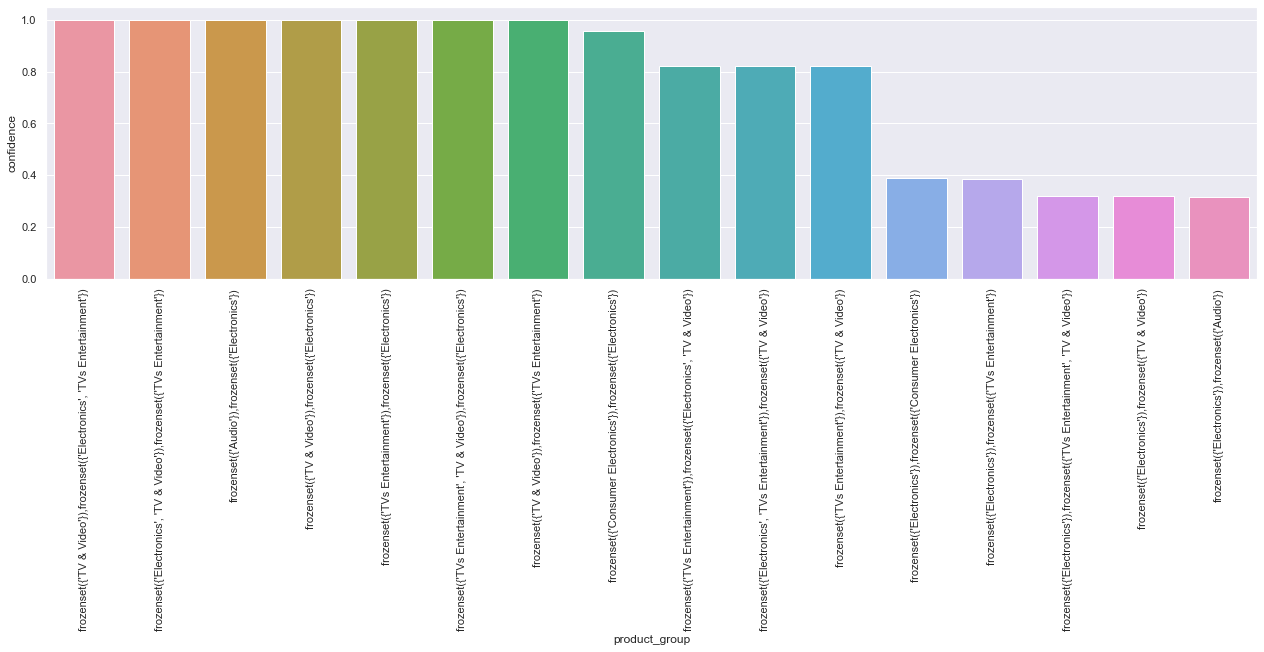

In [116]:
sns.set(font_scale=0.8) 
sns.set(rc={'figure.figsize':(21.7,5)})
sns.barplot(x="product_group",y="confidence",data=df1);
plt.xticks(rotation=90)
plt.show()

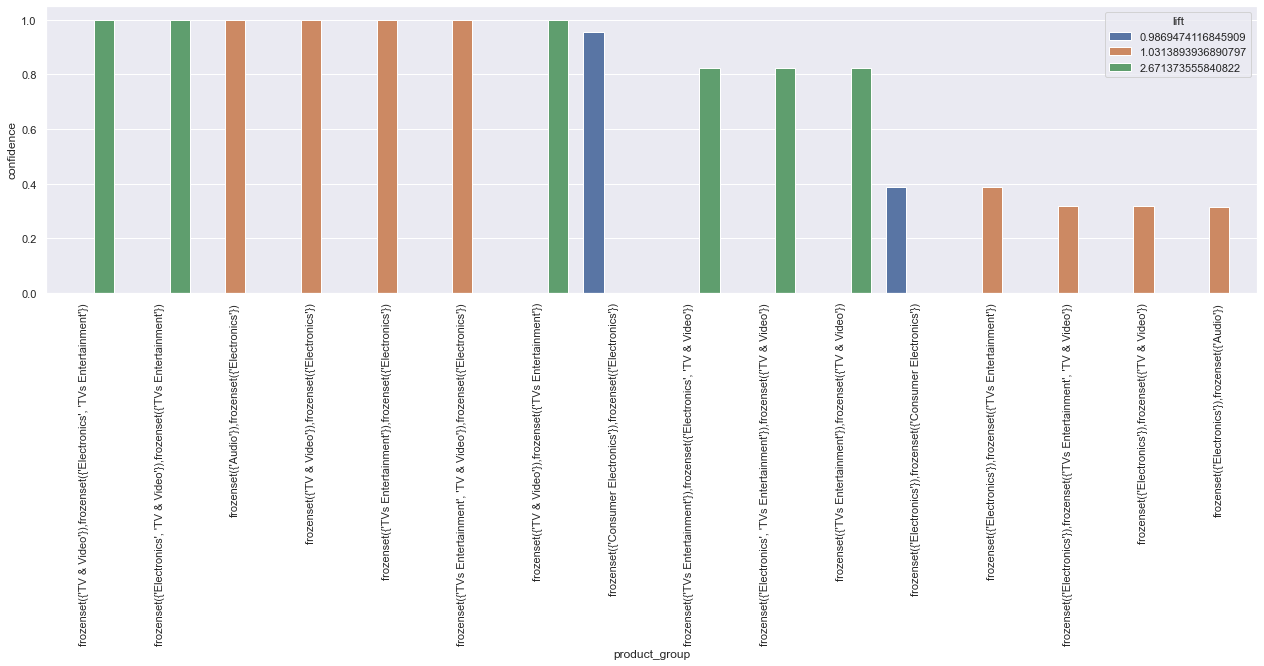

In [117]:
sns.set(font_scale=0.4) 
sns.set(rc={'figure.figsize':(21.7,5.27)})
sns.barplot(x="product_group",y="confidence",hue="lift",data=df1);
plt.xticks(rotation=90)
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
Interpretation:  TV and Electronics products increase their sales mutually by 2.67 times
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>